# Support Vector Machines

The purpose of this is to review Python syntax by fitting
a linear regression over simulated data.

In [139]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

## Linear

#### Data Generating Process

In [124]:
def inverse_logit(x):
    return(1 / (1 + np.exp(-x)))

In [126]:
np.random.seed(123)
X = np.random.multivariate_normal(mean=[-2,-3],cov=[[3,0],[0,1]],size=1111)
Z = 3 + 3*X[:,0] - 2*X[:,1]
probs = inverse_logit(Z)

y = np.random.binomial(size=1111,n=1,p=probs)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

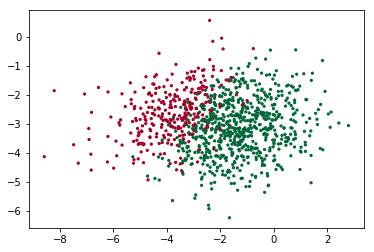

In [128]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, s=5, cmap=plt.cm.RdYlGn)
plt.show()

#### Scikit Learn

In [129]:
model = svm.LinearSVC(C=1)
model.fit(X_train,y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [130]:
print(model.intercept_)
print(model.coef_)

[ 0.75066055]
[[ 0.88150698 -0.64107908]]


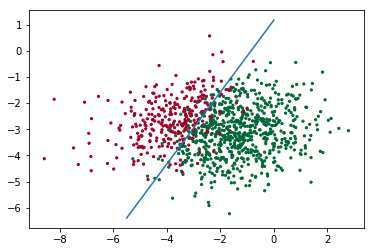

In [131]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, s=5, cmap=plt.cm.RdYlGn)
plt.plot(np.linspace(-5.5,0,1000),(-np.linspace(-5.5,0,1000)*model.coef_[0][0]-model.intercept_)/model.coef_[0][1])
plt.show()

In [132]:
sum(model.predict(X_test) == y_test) / y_test.size

0.9196428571428571

## Non-Linear

#### Data Generating Process

In [133]:
X = np.random.multivariate_normal(mean=[0,0],cov=[[0.8,0.2],[0.2,0.8]],size=1111)

In [134]:
Z = np.power(X[:,0],2) + np.power(X[:,1],2)
y = Z < 0.75
y = y.astype(int)

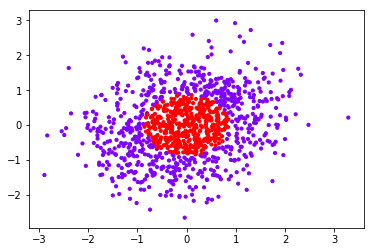

In [135]:
plt.scatter(X[:,0],X[:,1],c=y, s=10, cmap='rainbow')
plt.show()

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

#### Scikit Learn (kernel = 'rbf')

'rbf': radial basis function

In [137]:
model = svm.SVC(C=1,gamma='auto')
model.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [138]:
sum(model.predict(X_test) == y_test) / y_test.size

0.9821428571428571